In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

data = pd.read_csv('data.csv')

In [5]:
# import numpy as np
# import pandas as pd

def RSI(dataframe, period):
    '''
    Computes the RSI of a given price series for a given period length
    :param dataframe:
    :param period:
    :return dataframe with rsi:
    '''

    # TODO:---
    # for symbol in dataframe:
    #     all_prices = dataframe[symbol].close
    # ---

    # dataframe["RSI"] = dataframe.apply(lambda row: RSI)
    rsi = []

    for stock in dataframe['Symbol'].unique():
        all_prices = dataframe[dataframe['Symbol'] == stock]['Close']
        diff = np.diff(all_prices) # length is 1 less than the all_prices
        for i in range(period):
            rsi.append(None) # because RSI can't be calculated until period prices have occured

        for i in range(len(diff) - period + 1):
            avg_gain = diff[i:period + i]
            avg_loss = diff[i:period + i]
            avg_gain = abs(sum(avg_gain[avg_gain >= 0]) / period)
            avg_loss = abs(sum(avg_loss[avg_loss < 0]) / period)
            if avg_loss == 0:
                rsi.append(100)
            elif avg_gain == 0:
                rsi.append(0)
            else:
                rs = avg_gain / avg_loss
                rsi.append(100 - (100 / (1 + rs)))

    dataframe['RSI'] = rsi
    return dataframe


def PROC(dataframe, period):
    '''
    Computes the PROC(price rate of change) of a given price series for a given period length
    :param dataframe:
    :param period:
    :return proc:
    '''

    
    proc = []

    for stock in dataframe['Symbol'].unique():
        all_prices = list(dataframe[dataframe['Symbol'] == stock]['Close'])
        for i in range(period):
            proc.append(None) # because proc can't be calculated until period prices have occured
#         print(all_prices, "THEN LEN", len(all_prices))
#         print(all_prices[2])
        for i in range(len(all_prices) - period):
            if len(all_prices) <= period:
#                 print("This shouldn't be happening lololol", len(all_prices))
                proc.append(None)
            else:
#                 print("STOCK:", stock)
#                 print("INDEX:", i)
#                 print("LENGTH:", len(all_prices))
#                 print("WHAT WE HAVE SOFAR (LAST 3):", proc[-3:])
                proc.append((all_prices[i + period] - all_prices[i]) / all_prices[i])

    dataframe['PROC'] = proc
    return dataframe

#computes the stochastic oscillator 
def s_o(close, low, high):
    return 100 * (close - low)/(high - low)

def SO(dataframe, period):
    
    so = []
    
    
    for stock in dataframe['Symbol'].unique():
        all_prices = list(dataframe[dataframe['Symbol'] == stock]['Close'])
        
        for i in range(period):
            so.append(None)
 
        for i in range(len(all_prices) - period):
            C = all_prices[i]
            H = max(all_prices[i:i+period])
            L = min(all_prices[i:i+period])
            so.append(100 * ((C - L) / (H - L)))
                
    print("Length of so")
    print(len(so))
    print("Length of Dataframe")
    print(len(dataframe))
    dataframe['SO'] = so
    return dataframe

def Williams_R(dataframe, period):
    '''
    Williams %R
    Calculates fancy shit for late usage. Nice!

    EXAMPLE USAGE:
    data = pandas.read_csv("./data/ALL.csv", sep=",",header=0,quotechar='"')
    wr = Williams_R(data)
    print(wr)

    '''
    wr = []
    for stock in dataframe['Symbol'].unique():
        all_prices = list(dataframe[dataframe['Symbol'] == stock]['Close'])
        for i in range(period):
            wr.append(None) # because proc can't be calculated until period prices have occured
            
        for i in range(period-1,len(all_prices)-1):
            C = all_prices[i]
            H = max(all_prices[i-period+1:i])
            L = min(all_prices[i-period+1:i])
            wr_one = (
                ((H - C) 
                 / (H - L)) * -100
            )
            if wr_one <=-100:
                wr.append(-100)
            else:
                wr.append(wr_one)
    dataframe["WR"] = wr
    return dataframe



def diff_intervall(df, D):
    
    intervall = []
    for stock in df['Symbol'].unique():
        all_prices = list(df[df['Symbol']==stock]['Close'])
        
        #Nan-padding for later removal
        for i in range(len(all_prices)):
            intervall.append(None)
        
        for i in range(D,len(all_prices)-D):
            intervall[i] = np.sign(all_prices[i]- all_prices[i-D])
        
        
        #print(len(df))
        #print(len(intervall))
    df['DI-'+str(D)] = intervall
    return df                           
 

def On_Balance_Volume(dataframe):
    '''
    Williams %R
    Calculates fancy shit for late usage. Nice!

    EXAMPLE USAGE:
    data = pandas.read_csv("./data/ALL.csv", sep=",",header=0,quotechar='"')
    wr = Williams_R(data)
    print(wr)

    '''
    obv = []
    
    for stock in dataframe['Symbol'].unique():
        all_prices = list(dataframe[dataframe['Symbol'] == stock]['Close'])
        all_volumes = list(dataframe[dataframe['Symbol'] == stock]['Volume'])
    
        obv.append(dataframe.iloc[0]["Volume"])
        for i in range(1,len(all_prices)):
            C_old = all_prices[i-1]
            C = all_prices[i]
            if(C > C_old):
                obv.append(obv[i-1]+ all_volumes[i])
            elif (C < C_old):
                obv.append(obv[i - 1] - all_volumes[i])
            else:
                obv.append(obv[i-1])
                
    print("Length of obv")
    print(len(obv))
    print("Length of Dataframe")
    print(len(dataframe))
    dataframe['OBV'] = obv
    return dataframe


# data = pd.read_csv("./data/ALL.csv", sep=",",header=0,quotechar='"')
# print(data)
# obv = On_Balance_Volume(data)
# print(obv)


In [6]:
data = PROC(data, 14)
print("PROC: Done")
data = RSI(data,14)
print("RSI: Done")
data = SO(data,14)
print("SO: Done")
data = Williams_R(data, 14 )
print("Williams_R: Done")
data = diff_intervall(data, 1)
data = diff_intervall(data, 2)
data = diff_intervall(data, 3)
data = diff_intervall(data, 4)
data = diff_intervall(data, 5)
data = diff_intervall(data, 6)
print('Difference Done')

/home/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:69: RuntimeWarning: invalid value encountered in double_scalars
/home/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:69: RuntimeWarning: divide by zero encountered in double_scalars


PROC: Done
RSI: Done


/home/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:93: RuntimeWarning: invalid value encountered in double_scalars


Length of so
813632
Length of Dataframe
813632
SO: Done


/home/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:125: RuntimeWarning: divide by zero encountered in double_scalars
/home/leo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:125: RuntimeWarning: invalid value encountered in double_scalars


Williams_R: Done
Difference Done


In [7]:
data

,Date,Open,High,Low,Close,Volume,Symbol,DI-7,PROC,RSI,SO,WR,DI-1,DI-2,DI-3,DI-4,DI-5,DI-6
0,2010-01-04,31.39,31.63,31.13,31.30,2729240.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,31.21,31.22,30.76,30.96,2994237.0,A,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,30.85,31.00,30.76,30.85,2320299.0,A,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
3,2010-01-07,30.78,30.82,30.50,30.81,2213927.0,A,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,1.0,NaN,NaN,NaN
4,2010-01-08,30.64,30.85,30.40,30.80,2670856.0,A,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN
5,2010-01-11,30.88,31.05,30.67,30.82,3420258.0,A,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN
6,2010-01-12,30.56,30.65,30.22,30.45,2053677.0,A,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
7,2010-01-13,30.47,30.78,30.05,30.69,2445558.0,A,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
8,2010-01-14,30.59,31.24,30.50,31.15,4408930.0,A,1.0,NaN,NaN,NaN,NaN,-1.0,1.0,1.0,1.0,1.0,1.0
9,2010-01-15,31.22,31.36,30.33,30.43,3309434.0,A,1.0,NaN,NaN,NaN,NaN,-1.0,-1.0,1.0,1.0,1.0,1.0


In [8]:
data.to_csv("../data_preprocessed.csv")

In [18]:
data_processed = pd.read_csv("../data_preprocessed.csv")

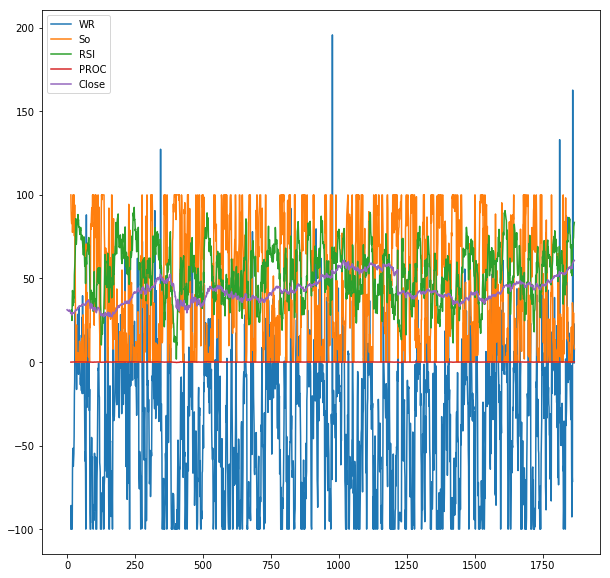

In [19]:
stock= data_processed['Symbol'].unique()[0]
plt.figure(figsize=(10,10))

plt.plot(data_processed[data_processed["Symbol"]==stock]["WR"],label="WR")
plt.plot(data_processed[data_processed["Symbol"]==stock]["SO"],label="So")
plt.plot(data_processed[data_processed["Symbol"]==stock]["RSI"],label="RSI")
plt.plot(data_processed[data_processed["Symbol"]==stock]["PROC"],label="PROC")

plt.plot(data_processed[data_processed["Symbol"]==stock]["Close"],label="Close")
plt.legend()